In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import f1_score


train_df = pd.read_csv("data/train.dat",header=None, delimiter=r"\s+", dtype=float)
X = train_df.values

train_labels_df = pd.read_csv("data/train.labels", header=None, delimiter=r"\s+", dtype=int)
Y = np.concatenate(np.array(train_labels_df.values), axis=0)

test_df = pd.read_csv("data/test.dat", header=None, delimiter=r"\s+", dtype=float)
test = test_df.values



In [2]:
from collections import Counter
c = Counter(Y )   
print(c)
print("len:",len(Y))

Counter({1: 10375, 2: 7646, 3: 1743, 8: 850, 4: 294, 5: 198, 7: 52, 6: 18, 11: 7, 10: 3})
len: 21186


# data-preporcessing


In [3]:
# delete the class :6,11,10,7
delete = [6,11,10,7]
df1 = pd.DataFrame(X)
df1['class'] = Y

df1 = df1[df1["class"] !=6]
#df1 = df1[df1["class"] !=7]
df1 = df1[df1["class"] !=10]
df1 = df1[df1["class"] !=11]

Y = df1["class"].values
df1= df1.drop(["class"], axis=1)
X = df1.values

In [4]:
#SMOTE
#!pip install imbalanced-learn
#!pip install delayed
#!pip install sklearn.utils.fixes
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [5]:
c = Counter(Y )   
print(c)
print("len:",len(Y))

Counter({2: 10375, 1: 10375, 3: 10375, 8: 10375, 4: 10375, 5: 10375, 7: 10375})
len: 72625


In [6]:
#pca = PCA(n_components = 0.70)
#pca = PCA(n_components=100)
#X= pca.fit_transform(X)

#pca.fit(X_test)
#pca_X_test = pca.transform(X_test)


In [7]:
# only use train data to test out models
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [8]:
modes = ['K-Neighbors','Random Forest','DecisionTree','Naive Bayes','SVM','LDA','XGBoost']
F1 = []

In [9]:
# K-Neighbors
kclf = KNeighborsClassifier(n_neighbors=10)

kclf = kclf.fit(X_train, y_train)
y_pred = kclf.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

In [10]:
# write data into correct format
np.savetxt('K_pca50.dat', y_pred, delimiter=',',fmt='%i')

In [11]:
"""
# ANN
!pip install keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(887, input_dim=887, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=150, batch_size=10)
predictions = model.predict(X_test)
"""

"\n# ANN\n!pip install keras\nfrom keras.models import Sequential\nfrom keras.layers import Dense\n\nmodel = Sequential()\nmodel.add(Dense(887, input_dim=887, activation='relu'))\nmodel.add(Dense(600, activation='relu'))\nmodel.add(Dense(400, activation='relu'))\nmodel.add(Dense(200, activation='relu'))\nmodel.add(Dense(50, activation='relu'))\n\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.fit(X, Y, epochs=150, batch_size=10)\npredictions = model.predict(X_test)\n"

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

In [13]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
rf1=DecisionTreeRegressor()
#rf2=RandomForestRegressor(n_estimators=1000)          
#rf3=ExtraTreesRegressor()
 
 
y_pred =rf1.fit(X_train,y_train).predict(X_test)

#y_rf2 =rf2.fit(X,Y).predict(X_test)
#y_rf3 =rf3.fit(X,Y).predict(X_test)
#score = f1_score(y_test, y_pred, average='micro')
score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

In [14]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

In [15]:
#SVM
from sklearn import svm
#clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

In [16]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

In [17]:
# write data into correct format
#np.savetxt('LDA.dat', y_pred, delimiter=',',fmt='%i')


In [18]:
#xgboost
!pip install xgboost
import xgboost as xgb


data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) 
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 0.05,
                max_depth = 31, alpha = 1, n_estimators = 50, enable_categorical = True)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
y_pred = y_pred.round(0)
y_pred  = y_pred.astype(int)
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
print("classification accuracy:", accuracy(y_test, y_pred)) 

score = f1_score(y_test, y_pred, average='micro')
F1.append(score)

[17:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


classification accuracy: 0.5623278869102258


In [19]:
print(modes) 
print(F1)

['K-Neighbors', 'Random Forest', 'DecisionTree', 'Naive Bayes', 'SVM', 'LDA', 'XGBoost']
[0.8626767027721681, 0.416743161373233, 0.8168257756563246, 0.43441343859004955, 0.8373416559574077, 0.18087938314668625, 0.5623278869102258]


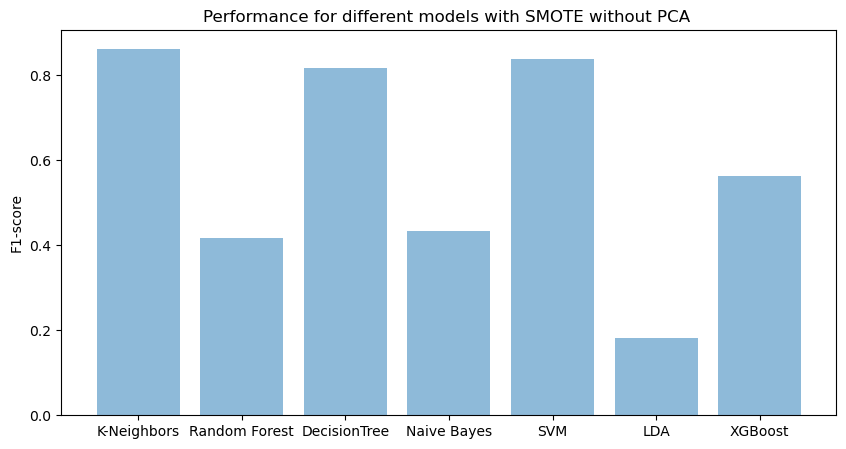

In [21]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
y_pos = np.arange(len(modes))

plt.bar(modes, F1, align='center', alpha=0.5)
plt.xticks(y_pos, modes)
plt.ylabel('F1-score')
plt.title('Performance for different models with SMOTE without PCA ')
plt.show()